In [1]:
%pip install tensorflow numpy matplotlib


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [12]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images= train_images/127.5 - 1
test_images= test_images/127.5 - 1

classes= ('planes','car','bird','cat','deer','dog','frog','horse','ship','truck')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 50s 0us/step


In [14]:
print('training dataset',train_images.shape[0])
print('testing dataset',test_images.shape[0])

training dataset 50000
testing dataset 10000


In [15]:
print('shape',{train_images[0].shape})

shape {(32, 32, 3)}


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

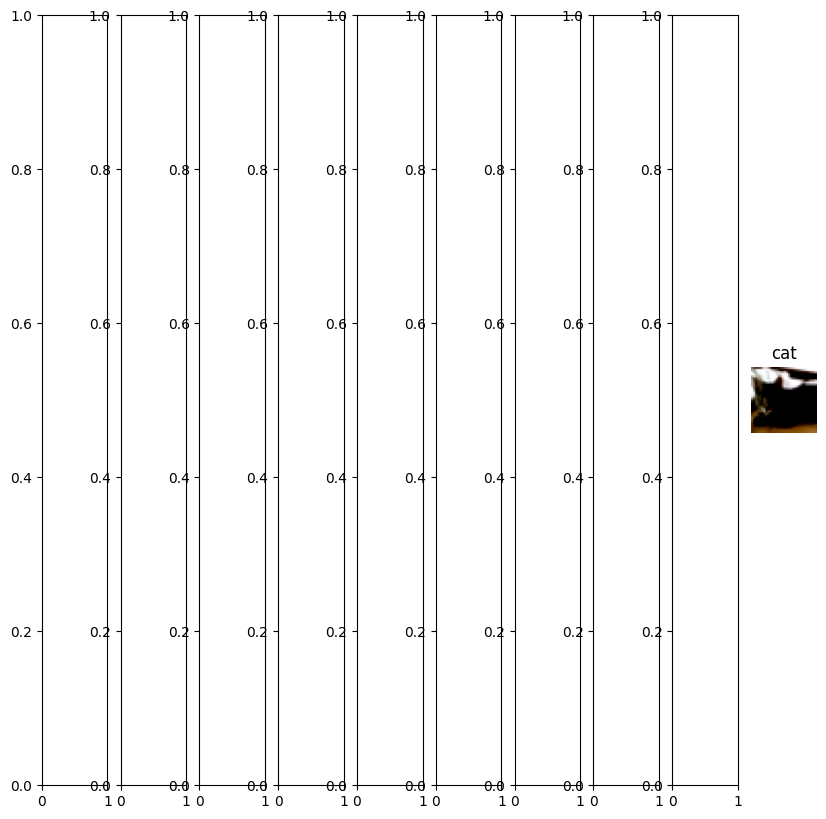

In [16]:
fig, axes = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
 image = train_images[i]
denormalized_image= (image+1/2)
axes[i].imshow(denormalized_image)
axes[i].set_title(classes[train_labels[i][0]])
axes[i].axis('off')

In [19]:
model = models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape= (32, 32, 3)),
    layers.MaxPooling2D((2,2), strides = (2,2)),
     layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2), strides = (2,2)),
    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dense(84,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │       553,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,742 (2.44 MB)

 Trainable params: 639,742 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',
   loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
),
history = model.fit(train_images, train_labels, epochs=10,

                    validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.4357 - loss: 1.5535 - val_accuracy: 0.6190 - val_loss: 1.0851
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6794 - loss: 0.9183 - val_accuracy: 0.6850 - val_loss: 0.9077
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7329 - loss: 0.7622 - val_accuracy: 0.7128 - val_loss: 0.8444
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7870 - loss: 0.6136 - val_accuracy: 0.7213 - val_loss: 0.8235
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8263 - loss: 0.4974 - val_accuracy: 0.7266 - val_loss: 0.8423
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8604 - loss: 0.3961 - val_accuracy: 0.7103 - val_loss: 0.9818
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8883 - loss: 0.3193 - val_accuracy: 0.7125 - val_loss: 1.0392
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9133 - loss: 0.2465 -

In [23]:
def view_classifications(image,probabilities):
  fig,(ax1,ax2) = plt.subplots(figsize=(6,9),ncols=2)
  denormalized_image = (image +1)/2
  ax1.imshow(denormalized_image)
  ax1.axis('off')
  ax2.barh(np.arange(10),probabilities)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(classes)
  ax2.set_title('Class Probablility')
  ax2.set_xlim(0, 1.1)
  plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


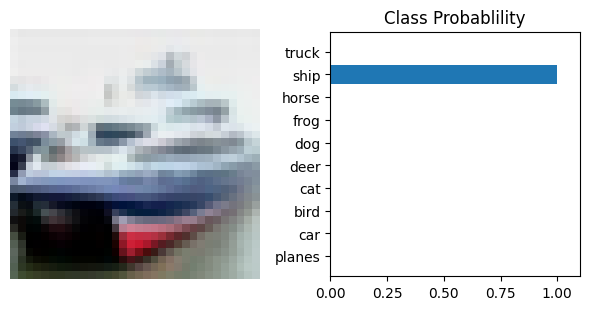

In [25]:
index =1
image ,label = test_images[index], test_labels[index]
probabilities = model.predict(image.reshape(1, 32, 32, 3))
view_classifications(image, probabilities[0])

In [26]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy of the model on {test_images.shape[0]} test images is : {test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7167 - loss: 1.3390
Accuracy of the model on 10000 test images is : 71.31%
